

### ML2.1 Методы метрической классификации

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

1.	Загрузите данные о диагностике сахарного диабета;

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
#pima = pima[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

2.	Разделите эти данные на тестовую и обучающую выборки;

In [5]:
# целевая переменная и факторы
Y = pima['label']
X = pima.drop(['label'], axis=1)

# обучающая и тестовая выборки
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)

3.	Постройте модель классификации для определения заболевания;

In [6]:
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
#y_pred

4.	Оцените качество модели на тестовой выборке с помощью следующих метрик:

a.	достоверность предсказания (accuracy);

b.	точность (precision);

c.	полнота (recall);

In [7]:
metrics.confusion_matrix(y_test, y_pred)

matrixes = []

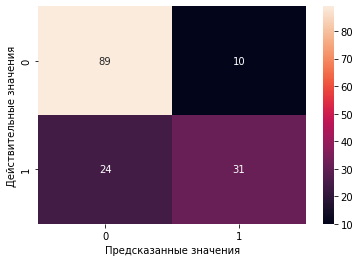

In [8]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

matrixes.append(metrics.confusion_matrix(y_test, y_pred))

In [9]:
print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_pred))

Метрика достоверности предсказания ->>  0.7792207792207793
Метрика точности ->>  0.7560975609756098
Метрика полноты ->>  0.5636363636363636


Пояснения

5.	Сделайте вывод о применимости модели.

## Контрольные вопросы
1.	Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?

Модель достаточно достоверно предсказывает - 77-78% предсказано верно, однако для медицины лучше увеличить точность. 

2.	Чем логистическая регрессия отличается от линейной?

Логистическая регрессия отличается от линейной регрессии тем что предсказывает значения, которые ограничены интервалом (0, 1)

3.	С помощью каких методов происходит оптимизация параметров логистической регрессии?

Параметр solver с возможными значениями ‘newton-cg’, ‘lbfgs’ (по умолчанию), ‘liblinear’, ‘sag’, ‘saga’

4.	Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?

В задачах с неравными классами эта метрика бесполезна, поэтому нужны оценки качества работы алгоритма на каждом из классов по отдельности

5.	Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?

Среднее гармоническое precision и recall (Классификация ошибки метрики)

6.	Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?

7.	В чем особенности метода ближайших соседей?

Анализируемый объект принадлежит к тому же классу, что и основная масса его соседей, то есть k ближайших к нему объектов анализируемой выборки

## Дополнительные задания

1.	Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.
2.	Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

In [10]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)
y_svc_pred = svc_model.predict(x_test)
#y_svc_pred

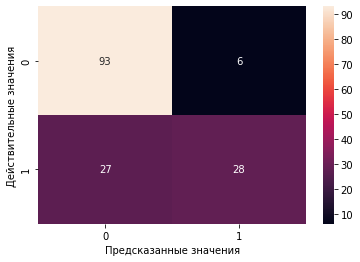

In [11]:
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_svc_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()
matrixes.append(metrics.confusion_matrix(y_test, y_svc_pred))

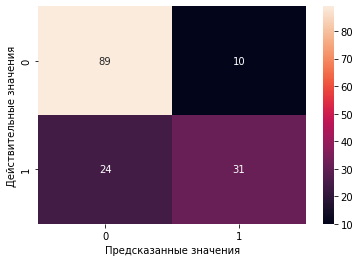

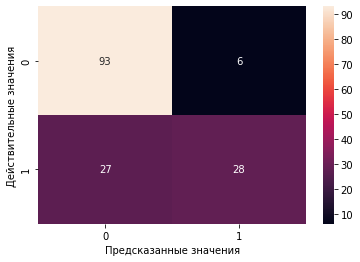

In [12]:
for matrix in matrixes:
    sns.heatmap(pd.DataFrame(
    matrix),
    annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

In [13]:
print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_svc_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_svc_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_svc_pred))

Метрика достоверности предсказания ->>  0.7857142857142857
Метрика точности ->>  0.8235294117647058
Метрика полноты ->>  0.509090909090909


In [14]:
print(metrics.classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



3.	Постройте модели классификации на основе следующих методов:

a.	логистическая регрессия (LogisticRegression);

b.	метод опорных векторов с линейным ядром (SVC);

c.	метод опорных векторов с гауссовым ядром (SVC);

d.	метод k ближайших соседей (KNeighborsClassifier);

e.	многослойный перцептрон (MLP);

f.	другие методы по желанию;

4.	Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

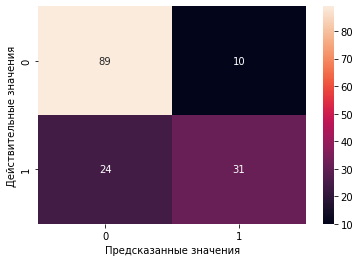

Метрика достоверности предсказания ->>  0.7792207792207793
Метрика точности ->>  0.7560975609756098
Метрика полноты ->>  0.5636363636363636
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [15]:
# метод опорных векторов с линейным ядром (SVC, kernel='linear')
linear_svc_model = SVC(kernel='linear')
linear_svc_model.fit(x_train, y_train)
y_linear_svc_pred = linear_svc_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_linear_svc_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_linear_svc_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_linear_svc_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_linear_svc_pred))

print(metrics.classification_report(y_test, y_linear_svc_pred))

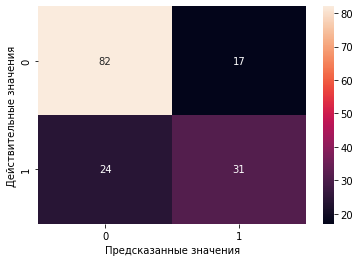

Метрика достоверности предсказания ->>  0.7337662337662337
Метрика точности ->>  0.6458333333333334
Метрика полноты ->>  0.5636363636363636
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [16]:
from sklearn.neighbors import KNeighborsClassifier

# метод k ближайших соседей (KNeighborsClassifier)
neigh_model = KNeighborsClassifier()
neigh_model.fit(x_train, y_train)
y_neigh_pred = neigh_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_neigh_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_neigh_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_neigh_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_neigh_pred))

print(metrics.classification_report(y_test, y_neigh_pred))

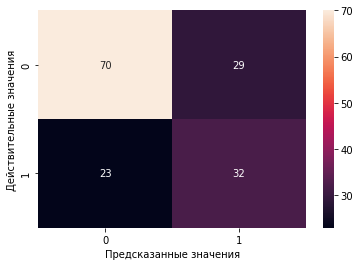

Метрика достоверности предсказания ->>  0.6623376623376623
Метрика точности ->>  0.5245901639344263
Метрика полноты ->>  0.5818181818181818
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [17]:
from sklearn.neural_network import MLPClassifier

# многослойный перцептрон (MLP)
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
y_mlp_pred = mlp_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_mlp_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_mlp_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_mlp_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_mlp_pred))

print(metrics.classification_report(y_test, y_mlp_pred))

In [18]:
methods_names =   ["линейная регрессия", 
                   "метод опорных векторов с гауссовым ядром", 
                   "метод опорных векторов с линейным ядром",
                   "метод k ближайших соседей",
                   "многослойный перцептрон"]
methods =  [y_pred,
            y_svc_pred,
            y_linear_svc_pred, 
            y_neigh_pred, 
            y_mlp_pred ]

print('Метрики                           достоверности предсказания       точности         полноты')
for i in range(len(methods)):
    print(f'{methods_names[i]:40}', 
          metrics.accuracy_score(y_test, methods[i]),
          metrics.precision_score(y_test, methods[i]),
          metrics.recall_score(y_test, methods[i]))

Метрики                           достоверности предсказания       точности         полноты
линейная регрессия                       0.7792207792207793 0.7560975609756098 0.5636363636363636
метод опорных векторов с гауссовым ядром 0.7857142857142857 0.8235294117647058 0.509090909090909
метод опорных векторов с линейным ядром  0.7792207792207793 0.7560975609756098 0.5636363636363636
метод k ближайших соседей                0.7337662337662337 0.6458333333333334 0.5636363636363636
многослойный перцептрон                  0.6623376623376623 0.5245901639344263 0.5818181818181818


5.	Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [19]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1, 30)

def print_learning_curve(model, x_train, y_train, train_sizes):
    _, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=train_sizes, cv=3)
    plt.title(model)
    plt.xlabel('train size')
    plt.ylabel('score')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training scores')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation scores')
    plt.legend()
    plt.show()

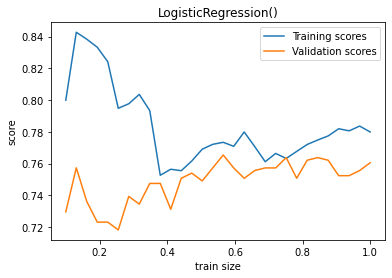

None


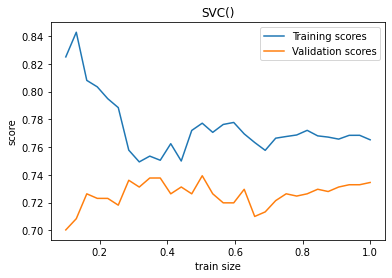

None


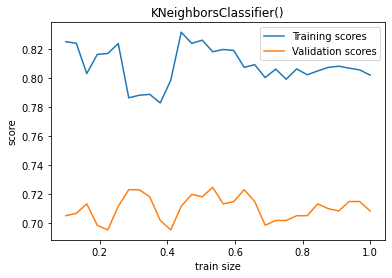

None


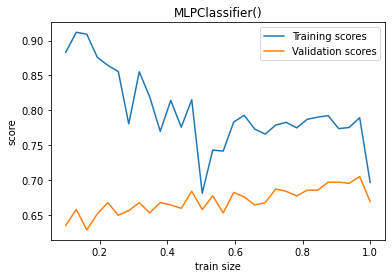

None


In [20]:
print(print_learning_curve(cls, x_train, y_train, train_sizes))
print(print_learning_curve(svc_model, x_train, y_train, train_sizes))
#print(print_learning_curve(linear_svc_model, x_train, y_train, train_sizes))
print(print_learning_curve(neigh_model, x_train, y_train, train_sizes))
print(print_learning_curve(mlp_model, x_train, y_train, train_sizes))

6.	Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [21]:
import sklearn
from sklearn.datasets import load_iris

iris = sklearn.datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
Y = pd.Series(iris['target'])
X.head(), Y.tail()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 145    2
 146    2
 147    2
 148    2
 149    2
 dtype: int64)

In [23]:
# обучающая и тестовая выборки
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)

логистическая регрессия


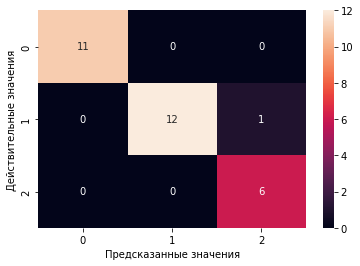

Метрика достоверности предсказания ->>  0.9666666666666667
Метрика точности ->>  0.9666666666666667
Метрика полноты ->>  0.9666666666666667


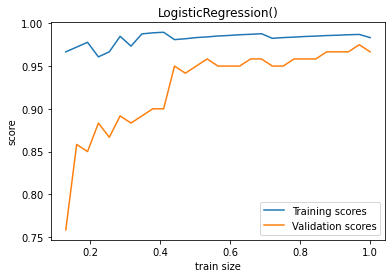

None


In [24]:
print('логистическая регрессия')
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

class_names = [0, 1, 2]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_pred, average='micro'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_pred, average='micro'))

print(print_learning_curve(cls, x_train, y_train, train_sizes))

метод опорных векторов с гауссовым ядром


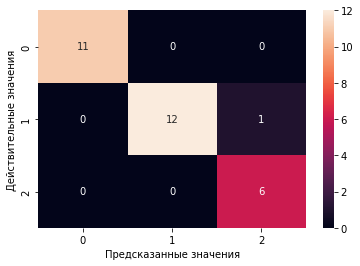

Метрика достоверности предсказания ->>  0.9666666666666667
Метрика точности ->>  0.9666666666666667
Метрика полноты ->>  0.9666666666666667


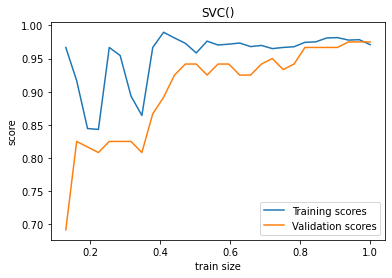

None


In [25]:
print('метод опорных векторов с гауссовым ядром')
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_svc_pred = svc_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_svc_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_svc_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_svc_pred, average='micro'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_svc_pred, average='micro'))

print(print_learning_curve(svc_model, x_train, y_train, train_sizes))

метод опорных векторов с линейным ядром


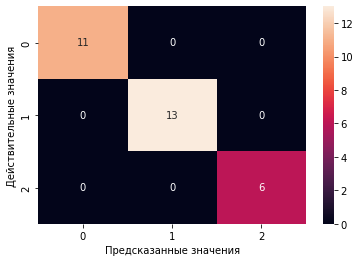

Метрика достоверности предсказания ->>  1.0
Метрика точности ->>  1.0
Метрика полноты ->>  1.0


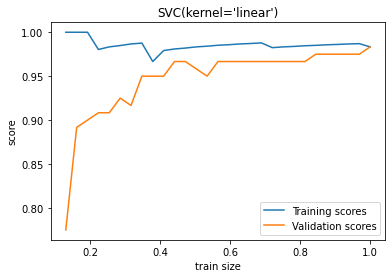

None


In [26]:
print('метод опорных векторов с линейным ядром')
linear_svc_model = SVC(kernel='linear')
linear_svc_model.fit(x_train, y_train)
y_linear_svc_pred = linear_svc_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_linear_svc_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_linear_svc_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_linear_svc_pred, average='micro'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_linear_svc_pred, average='micro'))

print(print_learning_curve(linear_svc_model, x_train, y_train, train_sizes))

метод k ближайших соседей


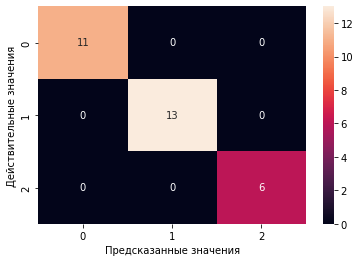

Метрика достоверности предсказания ->>  1.0
Метрика точности ->>  1.0
Метрика полноты ->>  1.0


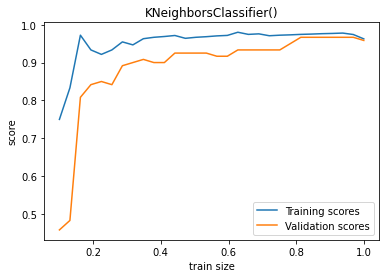

None


In [27]:
print('метод k ближайших соседей')
neigh_model = KNeighborsClassifier()
neigh_model.fit(x_train, y_train)
y_neigh_pred = neigh_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_neigh_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_neigh_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_neigh_pred, average='micro'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_neigh_pred, average='micro'))

print(print_learning_curve(neigh_model, x_train, y_train, train_sizes))

многослойный перцептрон


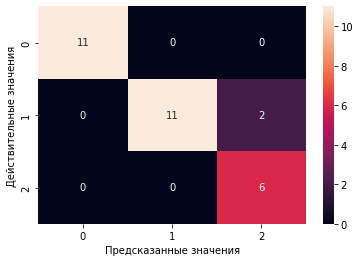

Метрика достоверности предсказания ->>  0.9333333333333333
Метрика точности ->>  0.9333333333333333
Метрика полноты ->>  0.9333333333333333


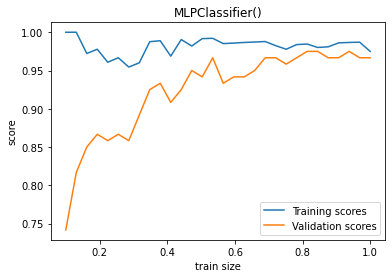

None


In [28]:
print('многослойный перцептрон')
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
y_mlp_pred = mlp_model.predict(x_test)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_mlp_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_mlp_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_mlp_pred, average='micro'))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_mlp_pred, average='micro'))

print(print_learning_curve(mlp_model, x_train, y_train, train_sizes))

In [29]:
methods_names =   ["линейная регрессия", 
                   "метод опорных векторов с гауссовым ядром", 
                   "метод опорных векторов с линейным ядром",
                   "метод k ближайших соседей",
                   "многослойный перцептрон"]
methods =  [y_pred,
            y_svc_pred,
            y_linear_svc_pred, 
            y_neigh_pred, 
            y_mlp_pred ]

print('Метрики                           достоверности предсказания       точности         полноты')
for i in range(len(methods)):
    print(f'{methods_names[i]:40}', 
          metrics.accuracy_score(y_test, methods[i]),
          metrics.precision_score(y_test, methods[i], average='micro'),
          metrics.recall_score(y_test, methods[i], average='micro'))

Метрики                           достоверности предсказания       точности         полноты
линейная регрессия                       0.9666666666666667 0.9666666666666667 0.9666666666666667
метод опорных векторов с гауссовым ядром 0.9666666666666667 0.9666666666666667 0.9666666666666667
метод опорных векторов с линейным ядром  1.0 1.0 1.0
метод k ближайших соседей                1.0 1.0 1.0
многослойный перцептрон                  0.9333333333333333 0.9333333333333333 0.9333333333333333
